We'll be working with the MNIST data for image character recognition

In [ ]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


Let's see how the data looks like: 60k 28x28 images

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
print(train_images.dtype)

uint8


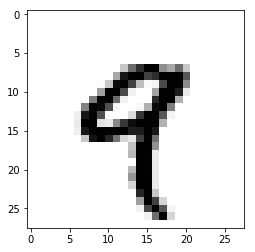

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Training labels is basically a vector of numbers, specifying which number we're looking at

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Let's have a look at the input data

In [6]:
print(train_images.ndim)

3


Let's build the network. input_shape lets the network know what type of data to expect. In this case it's a vector of scalars (hence the second comma, I think), of length 28x28

In [7]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

Softmax give a 10-dim 1 axis tensor with probabilities for each of the 10 digit values. 
Possibly the reason for 512 nodes on the first layer is because 28*28 = 784 and you don't want to lose a lot of data with very few nodes. Next specify metric, loss function and optimizer

In [8]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Now prepare image data: we'll need to reshape the image matrices to vectors, and then to normalize the values (0-1)

In [9]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

Prepare the labels: change format to one-hot

In [10]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Split between training and validation sets:

In [11]:
x_val = train_images[:1000]
y_val = train_labels[:1000]

train_images = train_images[1000:]
train_labels = train_labels[1000:]

In [12]:
history = network.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(x_val, y_val))

Train on 59000 samples, validate on 1000 samples
Epoch 1/5
59000/59000 [==============================] - 5s 82us/step - loss: 0.2611 - acc: 0.9249 - val_loss: 0.1410 - val_acc: 0.9600
Epoch 2/5
59000/59000 [==============================] - 5s 82us/step - loss: 0.1036 - acc: 0.9690 - val_loss: 0.1220 - val_acc: 0.9700
Epoch 3/5
59000/59000 [==============================] - 5s 82us/step - loss: 0.0685 - acc: 0.9798 - val_loss: 0.0884 - val_acc: 0.9750
Epoch 4/5
59000/59000 [==============================] - 7s 114us/step - loss: 0.0499 - acc: 0.9851 - val_loss: 0.0826 - val_acc: 0.9780
Epoch 5/5
59000/59000 [==============================] - 5s 81us/step - loss: 0.0370 - acc: 0.9888 - val_loss: 0.0810 - val_acc: 0.9780


Let's see what the history dict holds:

In [13]:
history_dict = history.history
history_dict.keys()

['acc', 'loss', 'val_acc', 'val_loss']

Let's have a look at how our model fit performed

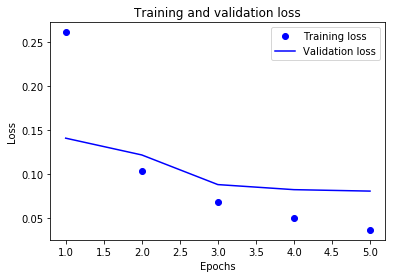

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

5 epochs isn't a lot, so there isn't a big chance of overfitting the data

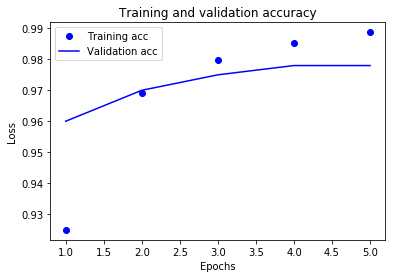

In [15]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

    Seems to be a good fit and decent accuracy. Let's test it

In [19]:
results = network.evaluate(test_images, test_labels)
print(results)

10000/10000 [==============================] - 0s 33us/step
[0.06804498326082248, 0.98]


98% accuracy